In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clean_path = "../1_datasets/processed/ppcs_mh_clean.csv"
mh = pd.read_csv(clean_path)
mh.head()



,sec1_hhid,sec1_gov_n,sec1_q1,sec1_q1_10,depression,depression_50,distress_swin,life_satisfaction,aggression_swin,ptsd_index,ptsd,ptsd_index_sd,depression_sd,distress_swin_sd,psychological_distress_aggregate,wgt18cal,gender
0,4.0,1. West Bank,NaN,2. Female,60.0,1.0,2.000000,7.0,1.206873,0.0,NaN,NaN,0.60,0.334076,0.311359,262.356268,Female
1,9.0,1. West Bank,NaN,1. Male,68.0,1.0,2.046266,7.5,1.125676,0.0,NaN,NaN,0.68,0.349481,0.343160,174.979536,Male
2,14.0,1. West Bank,NaN,1. Male,40.0,0.0,2.000000,8.0,1.275704,0.0,NaN,NaN,0.40,0.334076,0.244692,2164.916169,Male
3,15.0,1. West Bank,NaN,2. Female,48.0,0.0,1.887507,7.0,1.129536,0.0,NaN,NaN,0.48,0.296620,0.258873,184.581100,Female
4,17.0,1. West Bank,NaN,1. Male,44.0,0.0,2.000000,7.0,1.088409,1.0,NaN,0.2,0.44,0.334076,0.324692,218.105682,Male


In [34]:
mh.groupby("gender")["psychological_distress_aggregate"].mean()
mh.groupby("gender")["psychological_distress_aggregate"].agg(['mean', 'std', 'count'])



,mean,std,count
gender,,,
Female,0.361019,0.130436,3048
Male,0.376678,0.131633,2831


C:\Users\DELL\AppData\Local\Temp\ipykernel_13920\4270616676.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mh, x="gender", y="psychological_distress_aggregate", ci=None)


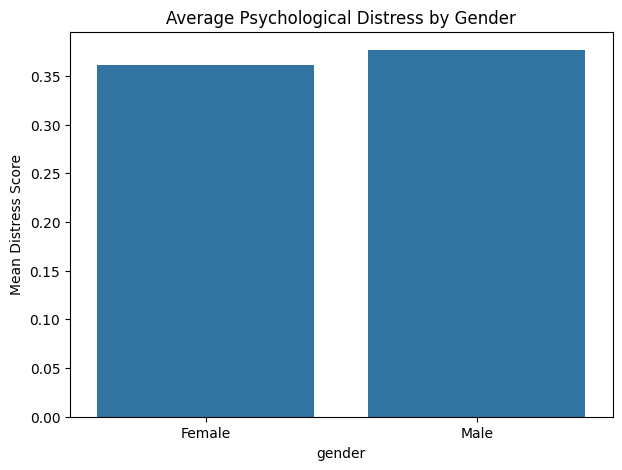

In [35]:
plt.figure(figsize=(7,5))
sns.barplot(data=mh, x="gender", y="psychological_distress_aggregate", ci=None)
plt.title("Average Psychological Distress by Gender")
plt.ylabel("Mean Distress Score")
plt.show()


Male participants show slightly higher average psychological distress than female participants. 
This suggests that men in this dataset may be experiencing greater stressors or trauma-related burdens, 
possibly linked to conflict exposure, economic pressures, or household responsibilities. 
These results highlight the importance of tailoring mental-health support to both genders.


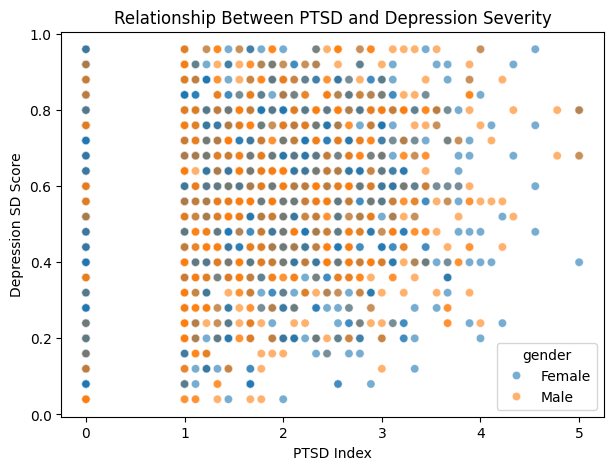

In [36]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=mh,
    x="ptsd_index",
    y="depression_sd",
    hue="gender",
    alpha=0.6
)
plt.title("Relationship Between PTSD and Depression Severity")
plt.xlabel("PTSD Index")
plt.ylabel("Depression SD Score")
plt.show()


In [37]:
mh[["ptsd_index", "depression_sd"]].corr()


,ptsd_index,depression_sd
ptsd_index,1.000000,0.111766
depression_sd,0.111766,1.000000


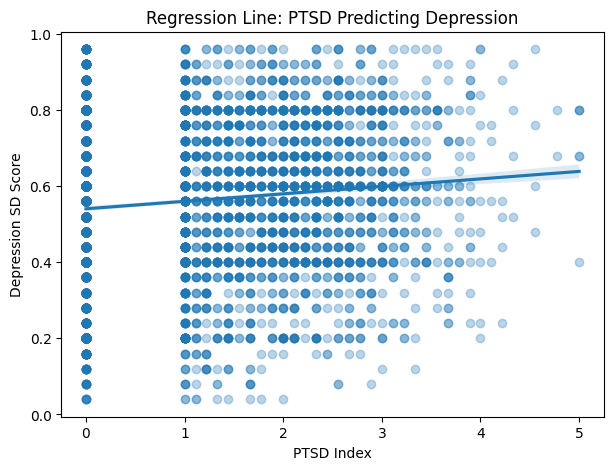

In [38]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=mh,
    x="ptsd_index",
    y="depression_sd",
    scatter_kws={'alpha':0.3}
)
plt.title("Regression Line: PTSD Predicting Depression")
plt.xlabel("PTSD Index")
plt.ylabel("Depression SD Score")
plt.show()


The scatter plot and regression line indicate a weak but positive relationship 
between PTSD symptoms and depression severity. Participants with higher PTSD Index 
scores show slightly higher levels of depression on average. Although the correlation 
is modest, it still reflects a meaningful connection between trauma exposure and 
emotional distress. This suggests that individuals experiencing more PTSD symptoms 
may also face elevated depressive symptoms, highlighting the importance of early 
screening and integrated mental-health support services.


In [39]:
def region_label(value):
    if "West Bank" in value:
        return "West Bank"
    elif "Gaza Strip" in value:
        return "Gaza Strip"
    else:
        return "Unknown"

mh["region"] = mh["sec1_gov_n"].apply(region_label)
mh["region"].value_counts()


region
West Bank     3427
Gaza Strip    2711
Name: count, dtype: int64

In [40]:
mh.groupby("region")["psychological_distress_aggregate"].mean()


region
Gaza Strip    0.414374
West Bank     0.342205
Name: psychological_distress_aggregate, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_13920\332225890.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


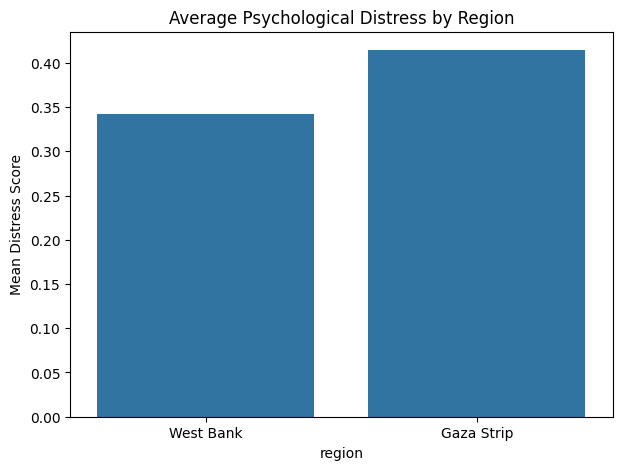

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=mh,
    x="region", 
    y="psychological_distress_aggregate",
    ci=None
)
plt.title("Average Psychological Distress by Region")
plt.ylabel("Mean Distress Score")
plt.show()


Participants in the Gaza Strip show higher average psychological distress than those 
in the West Bank. This pattern reflects the more severe and prolonged conflict exposure, 
movement restrictions, and economic hardship experienced by Gaza residents. These findings 
emphasize the need for more targeted mental-health interventions in Gaza.


In [42]:
mh.groupby("region")["depression_sd"].mean()


region
Gaza Strip    0.604673
West Bank     0.526673
Name: depression_sd, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_13920\4150952481.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


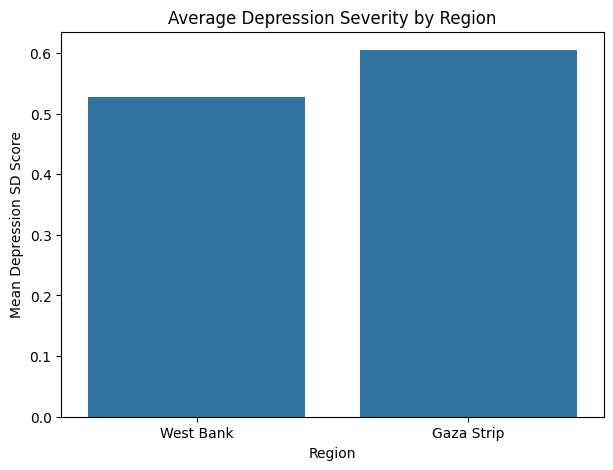

In [43]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=mh,
    x="region",
    y="depression_sd",
    ci=None
)
plt.title("Average Depression Severity by Region")
plt.ylabel("Mean Depression SD Score")
plt.xlabel("Region")
plt.show()


Participants in the Gaza Strip show higher average depression severity than those 
in the West Bank. This difference reflects the long-term humanitarian crisis, 
economic instability, and repeated conflict exposure affecting residents of Gaza. 
The findings highlight the need for region-specific mental-health interventions, 
particularly in Gaza where psychological stressors are more intense and persistent.


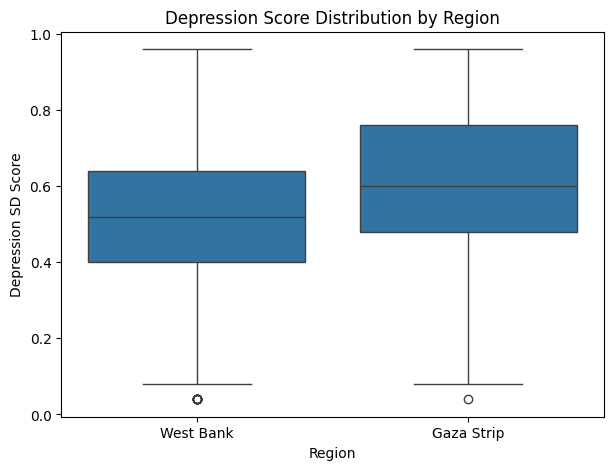

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=mh,
    x="region",
    y="depression_sd"
)
plt.title("Depression Score Distribution by Region")
plt.ylabel("Depression SD Score")
plt.xlabel("Region")
plt.show()


In [45]:
mh.groupby("region")["ptsd_index"].mean()



region
Gaza Strip    1.145539
West Bank     0.811497
Name: ptsd_index, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_13920\2110292653.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


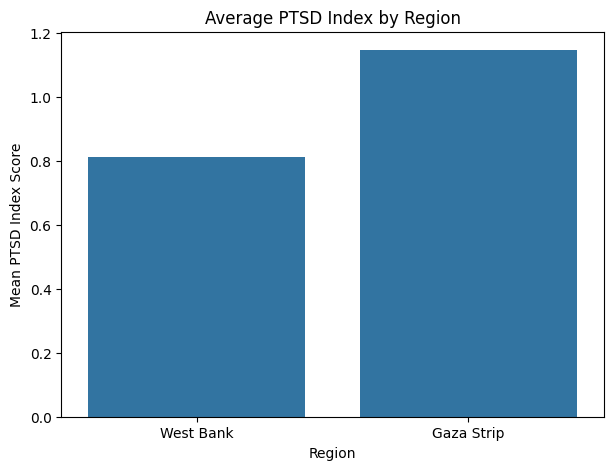

In [46]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=mh, 
    x="region", 
    y="ptsd_index",
    ci=None
)
plt.title("Average PTSD Index by Region")
plt.ylabel("Mean PTSD Index Score")
plt.xlabel("Region")
plt.show()


Participants in the Gaza Strip show higher average PTSD Index scores than those in 
the West Bank. This difference reflects the more severe and continuous trauma exposure 
faced by Gaza residents, including conflict events, displacement, infrastructure 
destruction, and limited access to safety and essential services. These findings 
underscore the need for mental-health interventions focused specifically on 
high-trauma communities in Gaza.


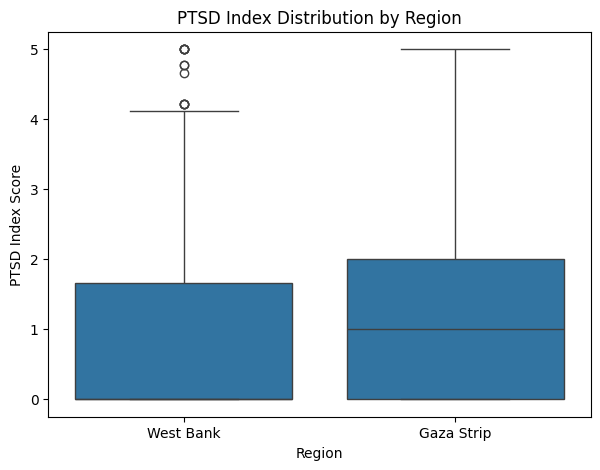

In [47]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=mh,
    x="region",
    y="ptsd_index"
)
plt.title("PTSD Index Distribution by Region")
plt.ylabel("PTSD Index Score")
plt.xlabel("Region")
plt.show()
